In [175]:
!pip3 install spotipy
!pip3 install billboard.py
!pip3 install lyricsgenius
!pip3 install nltk
!pip install matplotlib
!pip3 install seaborn

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [176]:
import pandas as pd
import numpy as np
import billboard as bb
import lyricsgenius
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.feature_extraction.text import TfidfVectorizer

In [177]:
genius = lyricsgenius.Genius("JxIIf2vA02Oopvz2JRUbC6iysXRZnNEHN0j84a16uLsB8niafpsNZPR1SvcSxu8r")
genius.verbose = False # Turn off status messages
genius.remove_section_headers = True # Remove section headers (e.g. [Chorus]) from lyrics when searching
genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

In [178]:
def create_songs_df(chart_name):
    top100 = bb.ChartData(chart_name)
    songs = top100.entries
    dataframe = {"Rank": [], "Title": [], "Artist": []}
    for song in songs:
        dataframe["Title"].append(song.title)
        dataframe["Artist"].append(song.artist)
        dataframe["Rank"].append(song.rank)
    df = pd.DataFrame(dataframe)
    return df

In [179]:
top100 = create_songs_df("hot-100")
country = create_songs_df("country-songs")
rock = create_songs_df("rock-songs")
pop = create_songs_df("pop-songs")
rap = create_songs_df('rap-song')

print(top100)

    Rank                            Title                          Artist
0      1                        Heartless                      The Weeknd
1      2                          Circles                     Post Malone
2      3  All I Want For Christmas Is You                    Mariah Carey
3      4                Someone You Loved                   Lewis Capaldi
4      5                         Memories                        Maroon 5
..   ...                              ...                             ...
95    96                    Make No Sense      YoungBoy Never Broke Again
96    97                   Jerry Sprunger             Tory Lanez & T-Pain
97    98        RITMO (Bad Boys For Life)  The Black Eyed Peas X J Balvin
98    99                 Into The Unknown             Panic! At The Disco
99   100                       La Cancion            J Balvin & Bad Bunny

[100 rows x 3 columns]


In [180]:
def try_load_lyrics(title,artist):
    try:
        return genius.search_song(title, artist).lyrics
    except:
        return "Failed to Find Lyrics"

In [181]:
def populate_chart_with_lyrics(chart):
    chart["lyrics"] = chart.apply(lambda x: try_load_lyrics(x["Title"],x["Artist"]), axis = 1)
    return chart

In [182]:
top100 = populate_chart_with_lyrics(top100)
display(top100)
len(top100[top100['lyrics'] == 'Failed to Find Lyrics'])

,Rank,Title,Artist,lyrics
0,1,Heartless,The Weeknd,"Young Metro, young Metro, young Metro (Sheesh)..."
1,2,Circles,Post Malone,"Oh, oh, oh\nOh, oh, oh\nOh, oh, oh, oh, oh\n..."
2,3,All I Want For Christmas Is You,Mariah Carey,I don't want a lot for Christmas\nThere is jus...
3,4,Someone You Loved,Lewis Capaldi,"I'm going under, and this time, I fear there's..."
4,5,Memories,Maroon 5,Here's to the ones that we got\nCheers to the ...
...,...,...,...,...
95,96,Make No Sense,YoungBoy Never Broke Again,Buddah Bless this beat\n\nI feel like I'm Gucc...
96,97,Jerry Sprunger,Tory Lanez & T-Pain,"Do, you do\nYou do, you do\nYou do, you do\nYo..."
97,98,RITMO (Bad Boys For Life),The Black Eyed Peas X J Balvin,"10/1\nAnt Clemons - ""4 Letter Word"" ft. Timbal..."
98,99,Into The Unknown,Panic! At The Disco,"Ah-ah, oh-oh\nAh-ah, oh-oh, oh-oh\nInto the un..."


0

In [183]:
client_credentials_manager = SpotifyClientCredentials(client_id = "ee9a1f8e2f634959967d52ed9fad54de", client_secret = "934a6bbc90e74664b502638f6f5fc92b")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [184]:
def get_spotify_popularity(title):
    title = title.replace("$","s")
    answer = sp.search(title, type="track", limit = 1)
    track = sp.track(answer["tracks"]["items"][0]["id"])
    return track["popularity"]

In [185]:
def populate_chart_with_spotify_popularity(chart):
    chart["spotify_popularity"] = chart.apply(lambda x: get_spotify_popularity(x["Title"]), axis = 1)
    return chart

In [186]:
top100 = populate_chart_with_spotify_popularity(top100)
display(top100)

,Rank,Title,Artist,lyrics,spotify_popularity
0,1,Heartless,The Weeknd,"Young Metro, young Metro, young Metro (Sheesh)...",94
1,2,Circles,Post Malone,"Oh, oh, oh\nOh, oh, oh\nOh, oh, oh, oh, oh\n...",99
2,3,All I Want For Christmas Is You,Mariah Carey,I don't want a lot for Christmas\nThere is jus...,94
3,4,Someone You Loved,Lewis Capaldi,"I'm going under, and this time, I fear there's...",96
4,5,Memories,Maroon 5,Here's to the ones that we got\nCheers to the ...,100
...,...,...,...,...,...
95,96,Make No Sense,YoungBoy Never Broke Again,Buddah Bless this beat\n\nI feel like I'm Gucc...,86
96,97,Jerry Sprunger,Tory Lanez & T-Pain,"Do, you do\nYou do, you do\nYou do, you do\nYo...",82
97,98,RITMO (Bad Boys For Life),The Black Eyed Peas X J Balvin,"10/1\nAnt Clemons - ""4 Letter Word"" ft. Timbal...",97
98,99,Into The Unknown,Panic! At The Disco,"Ah-ah, oh-oh\nAh-ah, oh-oh, oh-oh\nInto the un...",87


In [187]:
def create_term_doc_matrix(chart):
    lyrics = chart["lyrics"].to_list()
    vec = CountVectorizer()
    X = vec.fit_transform(lyrics)
    termdocmatrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names(), index=chart.Title)
    return termdocmatrix

top100 = top100[top100.lyrics != "Failed to Find Lyrics"]
create_term_doc_matrix(top100)

,000,02,10,100,101,10k,11,12,12am,14,...,کردن,کردیم,کسی,کلی,کمگ,کنار,کنیم,که,گرفتن,یه
Title,,,,,,,,,,,,,,,,,,,,,
Heartless,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Circles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
All I Want For Christmas Is You,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Someone You Loved,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Memories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Make No Sense,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jerry Sprunger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RITMO (Bad Boys For Life),1,1,33,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [188]:
def create_tfidf(chart):
    lyrics = chart["lyrics"].to_list()
    vectorizer = TfidfVectorizer()
    doc_vec = vectorizer.fit_transform(lyrics)
    tfidf = pd.DataFrame(doc_vec.toarray().transpose(), index=vectorizer.get_feature_names())
    tfidf.columns = chart["Title"]
    return tfidf

tfidf = create_tfidf(top100)
tfidf

Title,Heartless,Circles,All I Want For Christmas Is You,Someone You Loved,Memories,Good As Hell,Roxanne,Rockin' Around The Christmas Tree,Lose You To Love Me,"10,000 Hours",...,Follow God,Cuban Links,F.N,Candy,Tusa,Make No Sense,Jerry Sprunger,RITMO (Bad Boys For Life),Into The Unknown,La Cancion
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.008179,0.0,0.0,0.0,0.0,0.0,0.008179,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.008179,0.0,0.0,0.0,0.0,0.0,0.008179,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.252710,0.0,0.0,0.0,0.0,0.0,0.252710,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
کنار,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
کنیم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
که,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
گرفتن,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [189]:
def average_cosine_similarity(tfidf):
    similarity = 0
    count = 0
    for index in range(tfidf.shape[1]):
        col = tfidf.iloc[: , index]
        for ind2 in range(index + 1, tfidf.shape[1]):
            col2 = tfidf.iloc[: , ind2]
            similarity = similarity + np.dot(col.values,col2.values)/(np.linalg.norm(col.values)*np.linalg.norm(col2.values))
            count = count + 1
    return similarity/count
            
average_cosine_similarity(tfidf)

0.1032352139900712

In [190]:
def percent_of_top_100(songs):
    count = 0
    len = songs.shape[0] #num of rows
    
    for index, row in songs.iterrows():
        if ((top100['Title'] == row['Title']) & (top100['Artist'] == row['Artist'])).any():
            count += 1
            
    return count / 100
            
display(percent_of_top_100(rock))
display(percent_of_top_100(pop))
display(percent_of_top_100(country))

0.0

0.27

0.12

In [191]:
def get_lyric_len(chart):
    return create_term_doc_matrix(chart).sum(axis = 1, skipna = True)

display(get_lyric_len(top100))

Title
Heartless                           347
Circles                             300
All I Want For Christmas Is You     348
Someone You Loved                   303
Memories                            436
                                   ... 
Make No Sense                       474
Jerry Sprunger                      630
RITMO (Bad Boys For Life)          2021
Into The Unknown                    275
La Cancion                          387
Length: 100, dtype: int64

In [192]:
def get_chart_word_count(chart):
    return create_term_doc_matrix(chart).sum(axis = 0, skipna = True)

def find_most_freq_words(chart):
    counts = get_chart_word_count(chart)
    return counts.nlargest(10) 

    
freq = find_most_freq_words(top100)
display(freq)
display(freq / get_lyric_len(top100).sum(axis = 0, skipna = True))

you     1469
the     1193
me       819
it       692
to       653
and      599
my       526
yeah     420
that     419
on       386
dtype: int64

you     0.037181
the     0.030196
me      0.020729
it      0.017515
to      0.016528
and     0.015161
my      0.013313
yeah    0.010630
that    0.010605
on      0.009770
dtype: float64

In [193]:
def print_word_freq(chart):
    freq = find_most_freq_words(chart)
    
    display(freq)
    display(freq / get_lyric_len(chart).sum(axis = 0, skipna = True))
    
    freq = pd.DataFrame({'words':freq.index, 'word_cnt':freq.values})
    sns.barplot(x="words", y="word_cnt", data=freq)

you     752
the     569
to      357
me      339
it      310
and     269
my      208
know    201
that    189
oh      185
dtype: int64

you     0.049240
the     0.037258
to      0.023376
me      0.022197
it      0.020299
and     0.017614
my      0.013620
know    0.013161
that    0.012376
oh      0.012114
dtype: float64

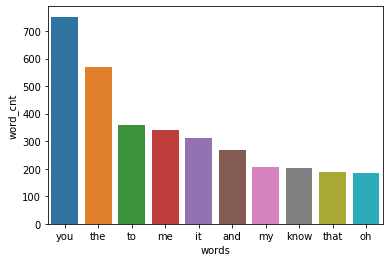

In [194]:
rock = populate_chart_with_lyrics(rock)
print_word_freq(rock)

you     649
the     452
me      340
to      312
it      283
and     255
my      235
that    192
all     168
we      157
dtype: int64

you     0.040654
the     0.028314
me      0.021298
to      0.019544
it      0.017727
and     0.015973
my      0.014721
that    0.012027
all     0.010524
we      0.009835
dtype: float64

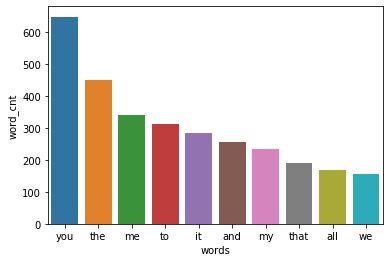

In [195]:
pop = populate_chart_with_lyrics(pop)
print_word_freq(pop)

the    547
you    527
and    345
to     275
on     214
we     211
in     199
it     199
my     181
of     174
dtype: int64

the    0.038031
you    0.036640
and    0.023987
to     0.019120
on     0.014879
we     0.014670
in     0.013836
it     0.013836
my     0.012584
of     0.012098
dtype: float64

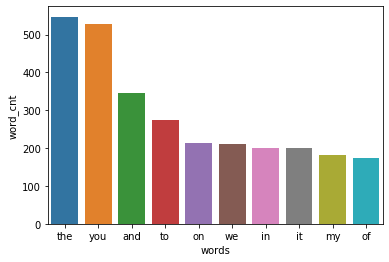

In [196]:
country = populate_chart_with_lyrics(country)
print_word_freq(country)

In [197]:
def find_most_freq_key_words(chart): #This removes unimportant words such as a, an, to, the, etc... 
    words = ['a', 'an', 'the','that','you','of', 'it', 'my', 'yeah', 'all', 'that', 'to', 'on', 'and', 'oh', 'be', 'in', 'when', 're', 'but', 'can', 'for', 'so']
    counts = get_chart_word_count(chart)
    counts = counts[~counts.index.isin(words)]
    return counts.nlargest(10) 

In [198]:
def print_word_key_freq(chart):
    freq = find_most_freq_key_words(chart)
    
    display(freq)
    display(freq / get_lyric_len(chart).sum(axis = 0, skipna = True))
    
    freq = pd.DataFrame({'words':freq.index, 'word_cnt':freq.values})
    sns.barplot(x="words", y="word_cnt", data=freq)
    

me      339
know    201
don     154
up      125
we      124
ll      116
like    112
what    106
your    102
down     99
dtype: int64

me      0.022197
know    0.013161
don     0.010084
up      0.008185
we      0.008119
ll      0.007596
like    0.007334
what    0.006941
your    0.006679
down    0.006482
dtype: float64

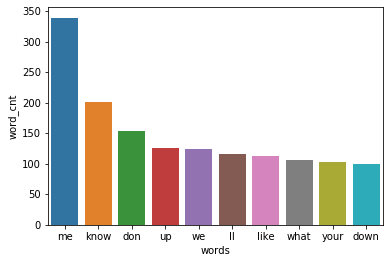

In [199]:
print_word_key_freq(rock)

me      340
we      157
don     155
ft      131
love    128
do      126
your    120
up      100
know     96
got      90
dtype: int64

me      0.021298
we      0.009835
don     0.009709
ft      0.008206
love    0.008018
do      0.007893
your    0.007517
up      0.006264
know    0.006014
got     0.005638
dtype: float64

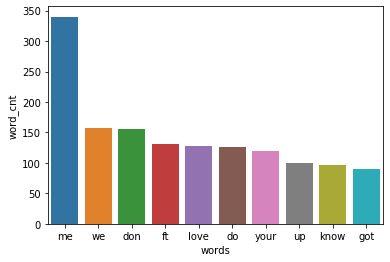

In [200]:
print_word_key_freq(pop)

we      211
me      168
got     155
your    145
what    132
don     116
one     115
she     114
just     98
ooh      98
dtype: int64

we      0.014670
me      0.011680
got     0.010777
your    0.010081
what    0.009178
don     0.008065
one     0.007996
she     0.007926
just    0.006814
ooh     0.006814
dtype: float64

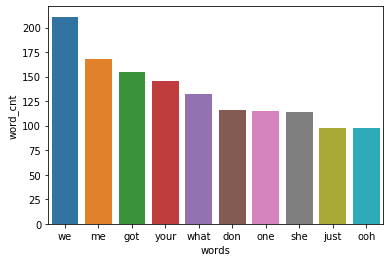

In [201]:
print_word_key_freq(country)

me      819
we      348
don     300
with    285
up      268
like    265
no      259
your    254
got     221
back    215
dtype: int64

me      0.020729
we      0.008808
don     0.007593
with    0.007214
up      0.006783
like    0.006707
no      0.006555
your    0.006429
got     0.005594
back    0.005442
dtype: float64

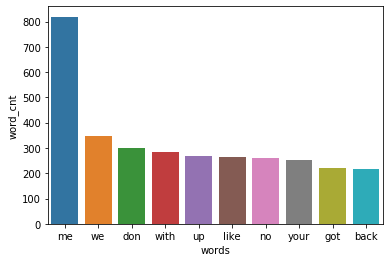

In [202]:
print_word_key_freq(top100)

In [203]:
#Are songs becoming more profane over time?
#We test this by looking into the percentage of lyrics that are profanities

!pip install profanity-check

from profanity_check import predict, predict_prob

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [204]:
def get_profan_freq(chart):
    freq = get_chart_word_count(chart)
    profan = {}
    percent = {}
    
    for row in freq.index:
        if predict([row]):
            profan[row] = freq[row]
            percent[row] = profan[row] / get_lyric_len(chart).sum(axis = 0, skipna = True)
               
    display(profan)
    display(percent)

In [205]:
get_profan_freq(top100)

{'ass': 32,
 'asshole': 3,
 'bastard': 1,
 'bitch': 93,
 'bitches': 19,
 'bullshit': 2,
 'cum': 1,
 'dick': 13,
 'fuck': 127,
 'fucked': 3,
 'fuckin': 7,
 'fucking': 8,
 'hoe': 1,
 'hoes': 8,
 'motherfucker': 2,
 'nigga': 116,
 'pussy': 15,
 'shit': 46,
 'stupid': 9}

{'ass': 0.0008099420385228682,
 'asshole': 7.593206611151889e-05,
 'bastard': 2.531068870383963e-05,
 'bitch': 0.0023538940494570856,
 'bitches': 0.000480903085372953,
 'bullshit': 5.062137740767926e-05,
 'cum': 2.531068870383963e-05,
 'dick': 0.0003290389531499152,
 'fuck': 0.0032144574653876334,
 'fucked': 7.593206611151889e-05,
 'fuckin': 0.00017717482092687741,
 'fucking': 0.00020248550963071705,
 'hoe': 2.531068870383963e-05,
 'hoes': 0.00020248550963071705,
 'motherfucker': 5.062137740767926e-05,
 'nigga': 0.0029360398896453974,
 'pussy': 0.00037966033055759446,
 'shit': 0.0011642916803766231,
 'stupid': 0.00022779619833455668}

In [206]:
get_profan_freq(pop)

{'ass': 8,
 'asshole': 3,
 'bitch': 24,
 'bitches': 4,
 'bullshit': 1,
 'dick': 6,
 'fuck': 26,
 'fucked': 2,
 'fuckin': 2,
 'hoes': 5,
 'nigga': 20,
 'pussy': 5,
 'shit': 15,
 'stupid': 6,
 'suck': 1}

{'ass': 0.0005011275369581559,
 'asshole': 0.00018792282635930844,
 'bitch': 0.0015033826108744675,
 'bitches': 0.00025056376847907793,
 'bullshit': 6.264094211976948e-05,
 'dick': 0.00037584565271861687,
 'fuck': 0.0016286644951140066,
 'fucked': 0.00012528188423953897,
 'fuckin': 0.00012528188423953897,
 'hoes': 0.00031320471059884743,
 'nigga': 0.0012528188423953897,
 'pussy': 0.00031320471059884743,
 'shit': 0.0009396141317965422,
 'stupid': 0.00037584565271861687,
 'suck': 6.264094211976948e-05}

In [212]:
def profan_cnt_graph(chart):
    doc = create_term_doc_matrix(chart)
    cols = doc.columns

    for i in cols:
        if not predict([i]):
            cols = cols.drop([i])

    doc = doc[cols]
    sum = doc.sum(axis = 1, skipna = True) 
    sum = pd.DataFrame({'Title':sum.index, 'profan_cnt':sum.values})

    sum['Rank'] = chart['Rank']
    sns.regplot(x="Rank", y="profan_cnt", data=sum)

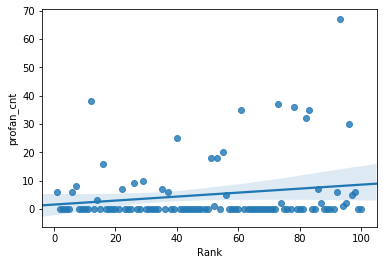

In [213]:
#Trend seems to be that higher ranking songs tend to have less profanity.
#This makes sense, less profanity makes the song easier to play in more places. 
profan_cnt_graph(top100)

In [217]:
get_profan_freq(pop)

{'ass': 8,
 'asshole': 3,
 'bitch': 24,
 'bitches': 4,
 'bullshit': 1,
 'dick': 6,
 'fuck': 26,
 'fucked': 2,
 'fuckin': 2,
 'hoes': 5,
 'nigga': 20,
 'pussy': 5,
 'shit': 15,
 'stupid': 6,
 'suck': 1}

{'ass': 0.0005011275369581559,
 'asshole': 0.00018792282635930844,
 'bitch': 0.0015033826108744675,
 'bitches': 0.00025056376847907793,
 'bullshit': 6.264094211976948e-05,
 'dick': 0.00037584565271861687,
 'fuck': 0.0016286644951140066,
 'fucked': 0.00012528188423953897,
 'fuckin': 0.00012528188423953897,
 'hoes': 0.00031320471059884743,
 'nigga': 0.0012528188423953897,
 'pussy': 0.00031320471059884743,
 'shit': 0.0009396141317965422,
 'stupid': 0.00037584565271861687,
 'suck': 6.264094211976948e-05}

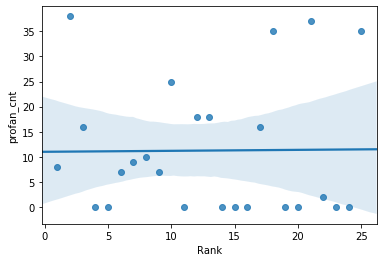

In [214]:
rap = populate_chart_with_lyrics(rap)
profan_cnt_graph(rap)

In [218]:
#Matching songs based off of lyrics
#A person enters n lyrics and we try to match which song in top100 is the best match
def find_best_match(words):
    print(tfidf[tfidf.index.isin(words)].sum(axis = 0, skipna = True).nlargest(1))

num = int(input("How many key words do you want to enter? "))
words = []

for i in range(num - 1):
    words.append(input("Please enter a key word: "))
words.append(input("Please enter your final key word: "))  

find_best_match(words)

How many key words do you want to enter? 4
Please enter a key word: christmas
Please enter a key word: all
Please enter a key word: I
Please enter your final key word: want
Title
All I Want For Christmas Is You    0.959786
dtype: float64
